In [1]:
import shap
import joblib
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open(r'/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/monkey_active_learning_results.sav', 'rb') as fr:
    [X_train_list, Y_train_list, iterX_f1_scores_list, iterX_macro_scores_list, iterX_predict_prob_list, sampled_idx_list] = joblib.load(fr)
with open(r'/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/monkey_using_all_train.sav', 'rb') as fr:
    [features_runlist, targets_runlist,
     peak_f1_scores, peak_macro_scores, peak_predict_prob] = joblib.load(fr)

## initialize and model fit 4 checkpoints

In [3]:
iter1_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1,
                               criterion='gini',
                               class_weight='balanced_subsample'
                              )
iter1_model.fit(X_train_list[0][-1], Y_train_list[0][-1])
iter9_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1,
                               criterion='gini',
                               class_weight='balanced_subsample'
                              )
iter9_model.fit(X_train_list[8][-1], Y_train_list[8][-1])
iter11_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1,
                               criterion='gini',
                               class_weight='balanced_subsample'
                              )
iter11_model.fit(X_train_list[10][-1], Y_train_list[10][-1])
iter13_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1,
                               criterion='gini',
                               class_weight='balanced_subsample'
                              )
iter13_model.fit(X_train_list[-1][-1], Y_train_list[-1][-1])

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=200,
                       n_jobs=-1, random_state=42)

## get SHAP values for each model

In [4]:
# Create object that can calculate shap values
iter1_explainer = shap.TreeExplainer(iter1_model)
# Calculate Shap values
iter1_shap_values = iter1_explainer.shap_values(X_train_list[0][-1])
# Create object that can calculate shap values
iter9_explainer = shap.TreeExplainer(iter9_model)
# Calculate Shap values
iter9_shap_values = iter9_explainer.shap_values(X_train_list[8][-1])
# Create object that can calculate shap values
iter11_explainer = shap.TreeExplainer(iter11_model)
# Calculate Shap values
iter11_shap_values = iter11_explainer.shap_values(X_train_list[10][-1])
# Create object that can calculate shap values
iter13_explainer = shap.TreeExplainer(iter13_model)
# Calculate Shap values
iter13_shap_values = iter13_explainer.shap_values(X_train_list[-1][-1])

## iteration #1

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


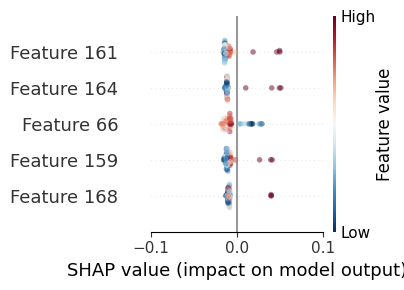

In [6]:
disp_n = 5
p = 2 # attack
shap.summary_plot(iter1_shap_values[p],  X_train_list[0][-1], max_display=disp_n,
                  alpha=0.5, show=False, plot_size=[4, 3], cmap="RdBu_r")
plt.xlim(xmin=-0.1, xmax=0.1)
plt.xticks(np.arange(-0.1, 0.11, 0.1))
fig = plt.gcf()

## iteration #9

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


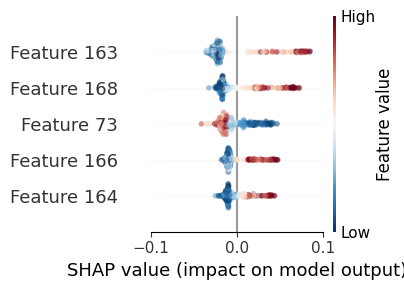

In [7]:
disp_n = 5
p = 2 # attack
shap.summary_plot(iter9_shap_values[p],  X_train_list[8][-1], max_display=disp_n,
                  alpha=0.5, show=False, plot_size=[4, 3], cmap="RdBu_r")
plt.xlim(xmin=-0.1, xmax=0.1)
plt.xticks(np.arange(-0.1, 0.11, 0.1))
fig = plt.gcf()

## iteration #11

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


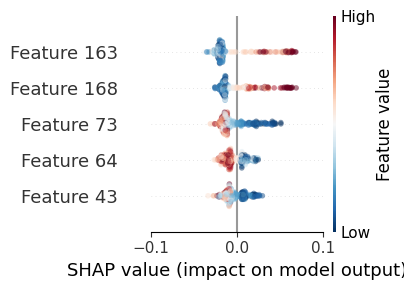

In [8]:
disp_n = 5
p = 2 # attack
shap.summary_plot(iter11_shap_values[p],  X_train_list[10][-1], max_display=disp_n,
                  alpha=0.5, show=False, plot_size=[4, 3], cmap="RdBu_r")
plt.xlim(xmin=-0.1, xmax=0.1)
plt.xticks(np.arange(-0.1, 0.11, 0.1))
fig = plt.gcf()

## iteration #13

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


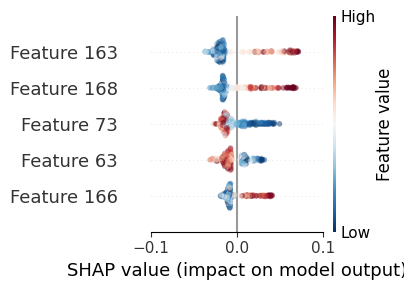

In [9]:
disp_n = 5
p = 2 # attack
shap.summary_plot(iter13_shap_values[p],  X_train_list[-1][-1], max_display=disp_n,
                  alpha=0.5, show=False, plot_size=[4, 3], cmap="RdBu_r")
plt.xlim(xmin=-0.1, xmax=0.1)
plt.xticks(np.arange(-0.1, 0.11, 0.1))
fig = plt.gcf()